## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df.shape


(52, 6)

In [ ]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
df= df.drop_duplicates()

In [ ]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

outlier detection


In [ ]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [ ]:
df.Rank.unique()
df.Sex.unique()
df.Degree.unique()


array([1, 0])

outliers chechecking for year col

In [ ]:
q1= df.Year.quantile(0.25)
q3 = df.Year.quantile(0.75)
iqr = q3-q1
iqr

8.0

In [ ]:
upper_threshold= 1.5*iqr+q3
print("upper_threshold:",upper_threshold)
lower_threshold = 1.5*iqr-q1
print("lower_threshold:",lower_threshold)
...

upper_threshold: 23.0
lower_threshold: 9.0


Ellipsis

outliers chechecking for ysdeg col

In [ ]:
q1= df.YSdeg.quantile(0.25)
q3 = df.YSdeg.quantile(0.75)
iqr = q3-q1
iqr

16.5

In [ ]:
upper_threshold= 1.5*iqr+q3
print("upper_threshold:",upper_threshold)
lower_threshold = 1.5*iqr-q1
print("lower_threshold:",lower_threshold)

upper_threshold: 48.0
lower_threshold: 18.0


outliers chechecking for salary col

In [ ]:
q1= df.Salary.quantile(0.25)
q3 = df.Salary.quantile(0.75)
iqr = q3-q1
iqr

9011.75

In [ ]:
upper_threshold= 1.5*iqr+q3
print("upper_threshold:",upper_threshold)
lower_threshold = 1.5*iqr-q1
print("lower_threshold:",lower_threshold)

upper_threshold: 40776.125
lower_threshold: -4729.125


In [ ]:
#no extreme outliers detected

sex vs salary plot

Text(0, 0.5, 'salary')

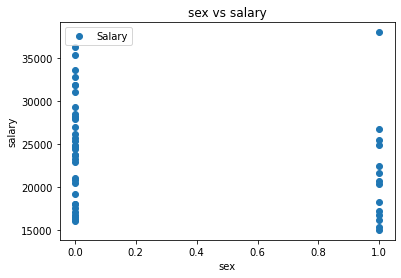

In [ ]:
df.plot(x= "Sex",y="Salary",style="o")
plt.title("sex vs salary")
plt.xlabel("sex")
plt.ylabel("salary")

Text(0, 0.5, 'salary')

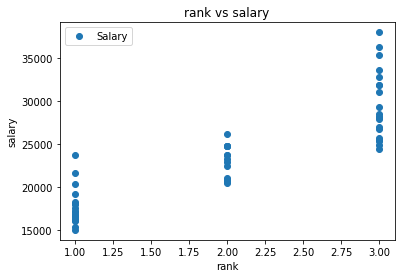

In [ ]:
df.plot(x= "Rank",y="Salary",style="o")
plt.title("rank vs salary")
plt.xlabel("rank")
plt.ylabel("salary")

Text(0, 0.5, 'salary')

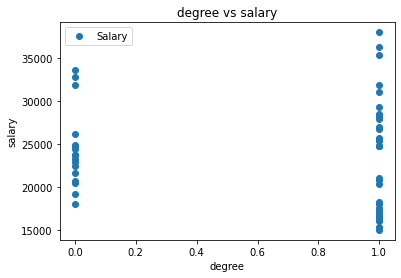

In [ ]:
df.plot(x= "Degree",y="Salary",style="o")
plt.title("degree vs salary")
plt.xlabel("degree")
plt.ylabel("salary")



Text(0, 0.5, 'salary')

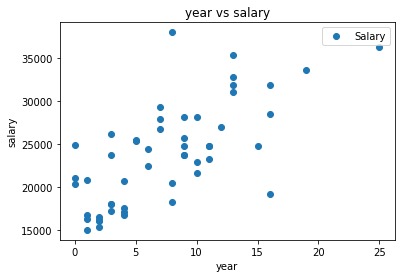

In [ ]:
df.plot(x= "Year",y="Salary",style="o")
plt.title("year vs salary")
plt.xlabel("year")
plt.ylabel("salary")

Text(0, 0.5, 'salary')

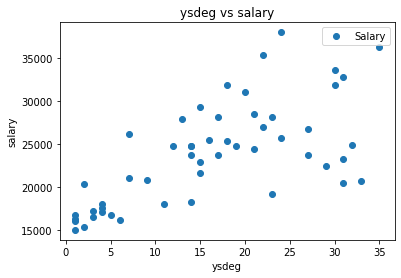

In [ ]:
df.plot(x= "YSdeg",y="Salary",style="o")
plt.title("ysdeg vs salary")
plt.xlabel("ysdeg")
plt.ylabel("salary")

In [ ]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


there seems a weak corr btw degree and salary -so lets tranform it

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


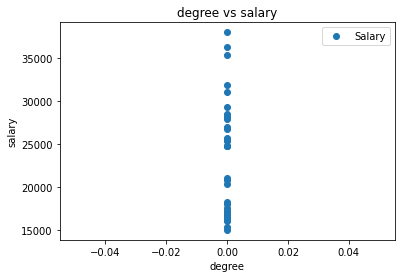

,transformed,Salary
transformed,NaN,NaN
Salary,NaN,1.0


In [ ]:
import numpy as np
df['transformed'] = np.log(df["Degree"])
df.plot(x='transformed', y='Salary', style='o')
plt.title('degree vs salary')
plt.xlabel('degree')
plt.ylabel('salary')
plt.show()
df[['transformed','Salary']].corr()

In [ ]:
#not able to get a strong corr even after tranformation,so will drop degree col

all features in x variable
and target variable in y

In [ ]:
df.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary', 'transformed'], dtype='object')

In [ ]:
X= df[["Sex","Rank","Year","YSdeg"]].values
y=df["Salary"].values

splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) 

model building

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test_scaled)

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank',
       'Year',"YSdeg"], columns=['Coefficient'])
coeff_df

,Coefficient
Sex,520.488840
Rank,4742.030287
Year,2478.594519
YSdeg,-644.681047


In [ ]:
regressor.intercept_ # c 

23655.90243902439

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,26182,21677.942288
1,17095,16839.395140
2,24750,26334.281234
3,22450,22815.872238
4,28200,29312.794047
5,21600,20003.589612
6,18075,16389.782625
7,23713,18471.615016
8,24800,24843.752522
9,33696,32928.216798


r2 score

In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.684991379008109


**feature importance**

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank',
       'Year',"YSdeg"], columns=['Coefficient'])
coeff_df

co-efficient of sex is not the highest so we can say sex does not play a vesy important role in determination of salary